In [1]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from persim import PersImage
import gudhi
import os
import glob
from matplotlib import ticker, cm
from matplotlib.colors import LogNorm
from sklearn.cluster import KMeans
import time
from sklearn.decomposition import PCA
import matplotlib as mpl
from sklearn import preprocessing

In [541]:
flist=np.sort(glob.glob("*3d_Z2_Ising*/2.7/*.txt"))

In [ ]:
for f in flist[0:50]:
    t0 = time.time()
    data = np.loadtxt(f, dtype=int)
    alpha_complex=gudhi.AlphaComplex(data)
    simplex_tree=alpha_complex.create_simplex_tree()
    PD=simplex_tree.persistence()
    PD0=[]
    PD1=[]
    PD2=[]
    for elm in PD:
        if elm[0]==1:
            PD1.append((elm[1][0],elm[1][1]-elm[1][0]))
        elif elm[0]==2:
            PD2.append((elm[1][0],elm[1][1]-elm[1][0]))
        else:
            if elm[1][1]!=float('inf'):
                PD0.append((elm[1][0],elm[1][1]-elm[1][0]))
    PD0=np.round(PD0,decimals=5)
    PD1=np.round(PD1,decimals=5)
    PD2=np.round(PD2,decimals=5)
    loc,counts=np.unique(PD0,axis=0,return_counts=True)
    toSave=np.array([[loc[i][0],loc[i][1],counts[i]] for i in np.arange(len(counts))])
    np.savetxt(f[:len(f)-4]+"PD0.dat",toSave)
    loc,counts=np.unique(PD1,axis=0,return_counts=True)
    toSave=np.array([[loc[i][0],loc[i][1],counts[i]] for i in np.arange(len(counts))])
    np.savetxt(f[:len(f)-4]+"PD1.dat",toSave)
    loc,counts=np.unique(PD2,axis=0,return_counts=True)
    toSave=np.array([[loc[i][0],loc[i][1],counts[i]] for i in np.arange(len(counts))])
    np.savetxt(f[:len(f)-4]+"PD2.dat",toSave)
    print(f, time.time() - t0)

Data_3d_Z2_Ising_Met_N=15_K=200\2.7\1553280072.txt 6.299524545669556
Data_3d_Z2_Ising_Met_N=15_K=200\2.7\1553280247.txt 6.145120143890381
Data_3d_Z2_Ising_Met_N=15_K=200\2.7\1553280281.txt 6.093036413192749
Data_3d_Z2_Ising_Met_N=15_K=200\2.7\1553280296.txt 6.1848719120025635
Data_3d_Z2_Ising_Met_N=15_K=200\2.7\1553280330.txt 6.668781995773315
Data_3d_Z2_Ising_Met_N=15_K=200\2.7\1553280400.txt 6.092675447463989
Data_3d_Z2_Ising_Met_N=15_K=200\2.7\1553280442.txt 6.12067437171936
Data_3d_Z2_Ising_Met_N=15_K=200\2.7\1553280520.txt 6.256270170211792
Data_3d_Z2_Ising_Met_N=15_K=200\2.7\1553280546.txt 6.1888816356658936
Data_3d_Z2_Ising_Met_N=15_K=200\2.7\1553280554.txt 6.061830282211304
Data_3d_Z2_Ising_Met_N=15_K=200\2.7\1553280602.txt 6.559427261352539
Data_3d_Z2_Ising_Met_N=15_K=200\2.7\1553280708.txt 6.336061000823975
Data_3d_Z2_Ising_Met_N=15_K=200\2.7\1553280747.txt 6.556922435760498
Data_3d_Z2_Ising_Met_N=15_K=200\2.7\1553280762.txt 6.780903100967407
Data_3d_Z2_Ising_Met_N=15_K=200\2

In [ ]:
fPD1list=np.sort(glob.glob("*3d_Z2_Ising*/*/*PD1.dat"))
TPD1list=[]
for f in fPD1list:
    TPD1list.append(float(f[32:35]))
np.array(np.unique(TPD1list, return_counts=True)).T

In [ ]:
#pdlocnum has format [[birth1, persistence1, counts1],...]
#bounds should be a list [bmin,bmax,pmin,pmax]
#bins should be a list [bbins, pbins]
def PerIm(pdloc,bounds,bins,stdev,res=1000):
    x = np.linspace(bounds[0], bounds[1], res)
    y = np.linspace(bounds[2], bounds[3], res)
    xx, yy = np.meshgrid(x, y, sparse=True)
    z=np.zeros([res,res])
    for i in np.arange(len(pdloc)):
        z=z+pdloc[i][1]*pdloc[i][2]*np.exp((-0.5*(xx-pdloc[i][0])**2-0.5*(yy-pdloc[i][1])**2)*stdev**-2)
    return z.reshape(bins[0],res//bins[0],bins[1],res//bins[1]).sum(3).sum(1)

In [ ]:
fPD1list=np.sort(glob.glob("*3d_Z2_Ising*/*/*PD1.dat"))
TPD1list=[]
for f in fPD1list:
    TPD1list.append(float(f[32:35]))

fPD2list=np.sort(glob.glob("*3d_Z2_Ising*/*/*PD2.dat"))
TPD2list=[]
for f in fPD2list:
    TPD2list.append(float(f[32:35]))

In [ ]:
pds1=[np.loadtxt(f) for f in fPD1list]
pds2=[np.loadtxt(f) for f in fPD2list]

In [ ]:
bounds=[0,5,0,5]
bins=[10,10]
res=bins[0]*10

imgs1=[PerIm(pd,bounds,bins,1,res=res) for pd in pds1]
imgs2=[PerIm(pd,bounds,bins,1,res=res) for pd in pds2]

In [ ]:
plt.imshow(imgs1[90],origin='lower')

In [ ]:
imgs1_array=np.array([img.flatten() for img in imgs1])
imgs2_array=np.array([img.flatten() for img in imgs2])

In [ ]:
labels1=[int(t<2.0166) for t in TPD1list]
labels2=[int(t<2.0166) for t in TPD2list]

In [ ]:
X_train, X_test, y_train, y_test, T_train, T_test = train_test_split(imgs2_array, labels2, TPD2list, test_size=0.5)

In [ ]:
logreg = LogisticRegression(C=0.1, solver='liblinear', penalty='l2')
logreg.fit(X_train, y_train)

inverse_image = np.copy(logreg.coef_).reshape((10,10))
fig, ax = plt.subplots()
cs = ax.imshow(inverse_image, origin='lower')
cbar = fig.colorbar(cs)

In [ ]:
pred = logreg.predict(X_test)
diff = abs(pred-y_test)
TT = np.arange(0.1,4.05,0.1)
TT = np.round(TT, decimals=3)
avg = np.zeros(len(TT))
acc = np.zeros(len(TT))
for i in np.arange(len(TT)):
    avg[i] = np.mean(pred[np.where(T_test==TT[i])[0]])
    acc[i] = np.mean(1-diff[np.where(T_test==TT[i])[0]])

plt.plot(TT, avg)

1.7


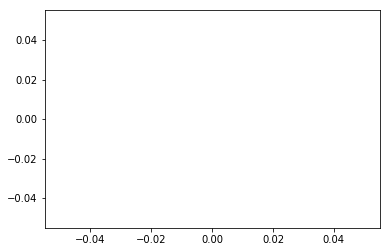

In [462]:
tRange = np.linspace(1.7,2.5,500)
interps = np.interp(tRange, TT, avg)

Tc = tRange[abs(interps-0.5).argmin()]

print(Tc)
plt.plot(tRange, interps)

**PCA**

In [466]:
imgs12_array=np.array([np.array([imgs1_array[i],imgs2_array[i]]).flatten() for i in range(len(imgs1_array))])

In [467]:
print(np.shape(imgs1_array))
print(np.shape(imgs2_array))
print(np.shape(imgs12_array))

(1200, 100)
(1200, 100)
(1200, 200)


In [468]:
pca = PCA(n_components=2)
X_r = pca.fit(imgs12_array).transform(imgs12_array)

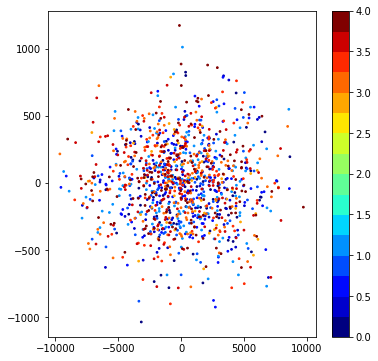

In [469]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,4,17)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
scat = ax.scatter([elm[0] for elm in X_r],[elm[1] for elm in X_r],c=TPD2list,s=3,cmap=cmap, norm=norm)
cbar = fig.colorbar(scat)
plt.show()

In [470]:
X_train, X_test, y_train, y_test, T_train, T_test = train_test_split(imgs12_array, labels2, TPD2list, test_size=0.5)

In [471]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)

2.5


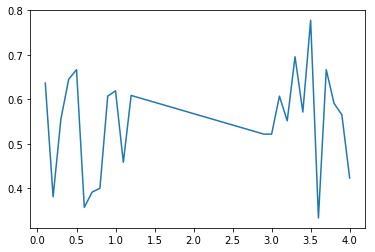

In [472]:
pred = kmeans.predict(X_test)
diff = abs(pred - y_test)
TT = np.unique(T_test)
TT = np.round(TT, decimals=3)
avg = np.zeros(len(TT))
acc = np.zeros(len(TT))
for i in np.arange(len(TT)):
    avg[i] = np.mean(pred[np.where(T_test==TT[i])[0]])
    acc[i] = np.mean(1-diff[np.where(T_test==TT[i])[0]])

plt.plot(TT, avg)

tRange = np.linspace(1.6,2.5,500)
interp = np.interp(tRange, TT, avg)

Tc = tRange[abs(interp-0.5).argmin()]
print(Tc)